## Import of the needed libraries:

In [138]:
# Import statements
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
import tweepy

from datetime import datetime
from functools import reduce

%matplotlib inline

# Data Gathering And Assess

### 1. WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)

In [139]:
df_twitter_orignal = pd.read_csv('twitter-archive-enhanced.csv')
#copy of the orginal data
df_twitter = df_twitter_orignal.copy()


In [140]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [141]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [142]:
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [143]:
df_twitter['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [144]:
df_twitter['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [145]:
df_twitter['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [146]:
df_twitter['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [147]:
df_twitter['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [148]:
df_twitter['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

 ### 2. Tweet image predictions (image-predictions.tsv)

In [149]:
df_image_orignal = pd.read_csv("image-predictions.tsv", sep='\t')
#Copy of the orignal data before getting clean
df_image = df_image_orignal.copy()

In [150]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [151]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [152]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

 ### 3. Additional Twitter data (tweet-json.txt)

In [153]:
consumer_key = 'XXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXx'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXxx'

#access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [154]:

#https://towardsdatascience.com/flattening-json-objects-in-python-f5343c794b10
api_data_orignal = []

#read the created file
with open("tweet_json.txt", "r") as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            #append a dictionary to the created list            
            api_data_orignal.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]                
            })               
                
            #tweet["entities"]["media"][0]["media_url"]
        except:
            print("Error.") 
            
df_api_orignal = pd.DataFrame(api_data_orignal, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
#Copy of the orignal Data
df_api = df_api_orignal.copy()
df_api.head()

,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,8287,37931,False,"[0, 85]"
1,892177421306343426,6119,32575,False,"[0, 138]"
2,891815181378084864,4054,24530,False,"[0, 121]"
3,891689557279858688,8424,41274,False,"[0, 79]"
4,891327558926688256,9128,39464,False,"[0, 138]"


In [155]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2340 non-null   int64 
 1   retweet_count       2340 non-null   int64 
 2   favorite_count      2340 non-null   int64 
 3   retweeted           2340 non-null   bool  
 4   display_text_range  2340 non-null   object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.5+ KB


In [156]:
df_api.isnull().sum()

tweet_id              0
retweet_count         0
favorite_count        0
retweeted             0
display_text_range    0
dtype: int64

# Some of the Quality Issues are 

### df_twitter dataframe

- tweet_id is an integer
- timestamp and retweeted_status_timestamp are currently of type 'object'
- name has values that are the string "None" instead of NaN
- Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)
- Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).

### df_image dataframe

- tweet_id is an integer
- p1,p2 and p3 have unnessary underscore instead of space.
- drop duplicate jpg_url.

### df_api dataframe

- rename id to tweet_id so can merge later.

# Tidiness Issues


## df_twitter dataframe
- 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

## df_api dataframe and df_image dataframe
- merging of all 3 data file into master file on the tweet_id


# Define :- Dog Stage
#### Issue:- 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

In [157]:
#Code
#Extract dog stages from 'text' column into new 'dog_stage' column 
df_twitter['dog_stage'] = df_twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [158]:
# Check that first few instances of dog_stage are similar 
# to that which was previously extracted
df_twitter[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [159]:
# Drop doggo, floofer, pupper, and puppo columns
df_twitter = df_twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [160]:
#Test
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

## Define:- Remove retweets
#### Issue:- Removes of retweets

**Solution:** columns 'in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id', 
'retweeted_status_timestamp' are drops

In [161]:
#Code
# Keep columns where 'retweeted_status_id' is NaN
df_twitter = df_twitter[np.isnan(df_twitter.retweeted_status_id)]

# Check info to determine all there are no non-null entries for
# 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp'
print(df_twitter.info())

# Remove 'retweeted_status_id', 'retweeted_status_user_id' , 'in_reply_to_status_id','in_reply_to_user_id','source' and 
# 'retweeted_status_timestamp' columns
df_twitter = df_twitter.drop(['in_reply_to_status_id', 
                              'in_reply_to_user_id',
                            'source','retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

In [162]:
#Test
# Check info to ensure the 'retweeted_status_id', 'retweeted_status_user_id' 
# and 'retweeted_status_timestamp' columns have been dropped
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   expanded_urls       2117 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   dog_stage           364 non-null    object
dtypes: int64(3), object(5)
memory usage: 152.9+ KB


## Define:- Type change
#### Issue:- tweet_id is in int data type need to change into object data type

In [163]:
#Code
df_twitter["tweet_id"] = df_twitter["tweet_id"].astype(str)
df_image["tweet_id"] = df_image["tweet_id"].astype(str)
df_api["tweet_id"] = df_api["tweet_id"].astype(str)

In [164]:
#Test
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   expanded_urls       2117 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   dog_stage           364 non-null    object
dtypes: int64(2), object(6)
memory usage: 152.9+ KB


In [165]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [166]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2340 non-null   object
 1   retweet_count       2340 non-null   int64 
 2   favorite_count      2340 non-null   int64 
 3   retweeted           2340 non-null   bool  
 4   display_text_range  2340 non-null   object
dtypes: bool(1), int64(2), object(2)
memory usage: 75.5+ KB


## Define:- 'timestamp' type

#### Issue:- timestamp coloumn need to to change into date and time 

In [167]:
#Code
df_twitter['timestamp'] = df_twitter['timestamp'].str.slice(start=0, stop=-6)

In [168]:
df_twitter['timestamp'] = pd.to_datetime(df_twitter['timestamp'],format ="%Y-%m-%d %H:%M:%S")

In [169]:
#Test
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   expanded_urls       2117 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                2175 non-null   object        
 7   dog_stage           364 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 152.9+ KB


##  Define :-Various NaN value


In [170]:
#Code
# Replace all 'None's with a NaN
df_twitter['name'].replace('None', 
                        np.nan,
                       inplace = True)


In [171]:
#Test
df_twitter["name"].value_counts()

a             55
Lucy          11
Charlie       11
Oliver        10
Cooper        10
              ..
Dante          1
Enchilada      1
Gromit         1
Longfellow     1
Bloo           1
Name: name, Length: 955, dtype: int64

# Define :- Dog_type

In [172]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(df_image):
    if df_image['p1_dog'] == True:
        dog_type.append(df_image['p1'])
        confidence_list.append(df_image['p1_conf'])
    elif df_image['p2_dog'] == True:
        dog_type.append(df_image['p2'])
        confidence_list.append(df_image['p2_conf'])
    elif df_image['p3_dog'] == True:
        dog_type.append(df_image['p3'])
        confidence_list.append(df_image['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
df_image.apply(image, axis=1)

#create new columns
df_image['dog_type'] = dog_type
df_image['confidence_list'] = confidence_list

In [173]:
#drop rows that has prediction_list 'error'
df_image = df_image[df_image['dog_type'] != 'Error']

#TEST: 
df_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   object 
 1   jpg_url          1751 non-null   object 
 2   img_num          1751 non-null   int64  
 3   p1               1751 non-null   object 
 4   p1_conf          1751 non-null   float64
 5   p1_dog           1751 non-null   bool   
 6   p2               1751 non-null   object 
 7   p2_conf          1751 non-null   float64
 8   p2_dog           1751 non-null   bool   
 9   p3               1751 non-null   object 
 10  p3_conf          1751 non-null   float64
 11  p3_dog           1751 non-null   bool   
 12  dog_type         1751 non-null   object 
 13  confidence_list  1751 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 169.3+ KB


## Define :- Inaccurate ratings
#### Issue:- Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10.

In [174]:
# Code
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in df_twitter['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [175]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[45, 695, 763, 1689, 1712]

In [176]:
#Test
df_twitter.loc[40]

tweet_id                                             884562892145688576
timestamp                                           2017-07-11 00:00:02
text                  This is Kevin. He's just so happy. 13/10 what ...
expanded_urls         https://twitter.com/dog_rates/status/884562892...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                              Kevin
dog_stage                                                           NaN
Name: 40, dtype: object

## Define :- Rating
#### Issue:- No rating column was their .

In [177]:
#Code
df_twitter['rating'] = df_twitter['rating_numerator'] / df_twitter['rating_denominator']


In [178]:
#Test
df_twitter.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,1.3


In [179]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   expanded_urls       2117 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                1495 non-null   object        
 7   dog_stage           364 non-null    object        
 8   rating              2175 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 249.9+ KB


### Merge

In [180]:
# Merge of all 3 file df_witter df_image df_api
df_master = pd.merge(df_twitter, df_image, on ='tweet_id', how= 'inner' )
df_master = pd.merge(df_master, df_api, on = 'tweet_id', how = 'inner' )
#Make a orignal copy of merge data
df_master_orginal = df_master.copy()

In [181]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1683
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1684 non-null   object        
 1   timestamp           1684 non-null   datetime64[ns]
 2   text                1684 non-null   object        
 3   expanded_urls       1684 non-null   object        
 4   rating_numerator    1684 non-null   int64         
 5   rating_denominator  1684 non-null   int64         
 6   name                1265 non-null   object        
 7   dog_stage           274 non-null    object        
 8   rating              1684 non-null   float64       
 9   jpg_url             1684 non-null   object        
 10  img_num             1684 non-null   int64         
 11  p1                  1684 non-null   object        
 12  p1_conf             1684 non-null   float64       
 13  p1_dog              1684 non-null   bool        

# Duplicated img_num

In [182]:
df_master.jpg_url.duplicated().sum()

0

In [183]:
df_master.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')

# Visualization

<Figure size 720x720 with 0 Axes>

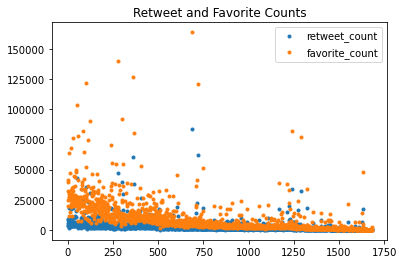

In [184]:
# plotting different realtionship between vaibles
plt.figure(figsize = (10, 10))
df_master[['retweet_count', 'favorite_count']].plot(style = '.')
plt.title('Retweet and Favorite Counts');
fig = plt.gcf() 
fig.savefig('Retweet.png',bbox_inches='tight');

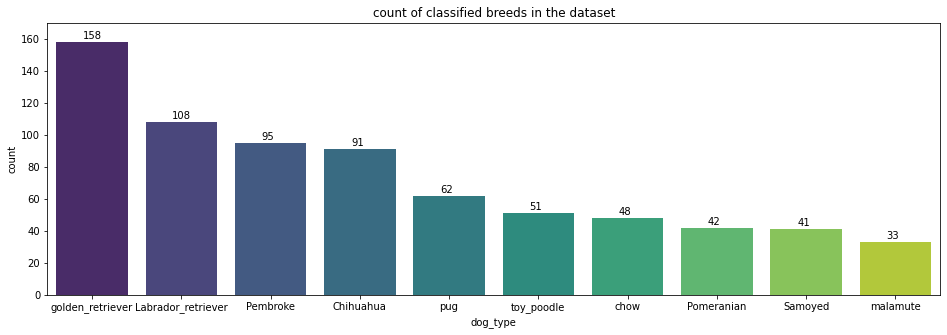

In [185]:
#https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.countplot(x = "dog_type", data = df_master, order=df_master.dog_type.value_counts().iloc[:10].index, palette = "viridis")
ax.set_title("count of classified breeds in the dataset");

ax.set_ylim(0, 170)
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))
    
fig.savefig('bread.png',bbox_inches='tight');    

# Relation between Retweets & Likes

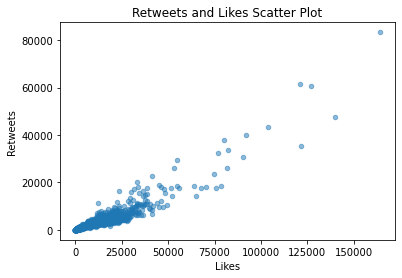

In [186]:
#Retweets vs. Likes

df_master.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')

plt.savefig('Retweets_vs_Likes.png', bbox_inches='tight')

C:\Users\Amit Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


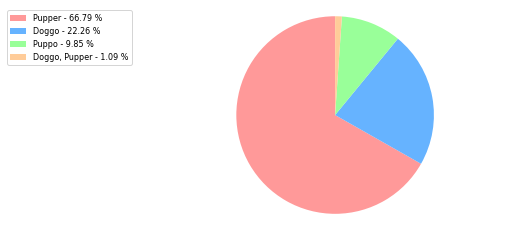

In [187]:
x = np.char.array(['Pupper', 'Doggo', 'Puppo', 'Doggo, Pupper', 'Floofer', 'Doggo, Puppo', 'Doggo, Floofer'])
y = np.array(list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:7])
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E580E8','#FF684F','#DCDCDD']
porcent = 100.*y/y.sum()
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.8)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]



plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.axis('equal')

plt.savefig('Most_common_dog.png', bbox_inches='tight')

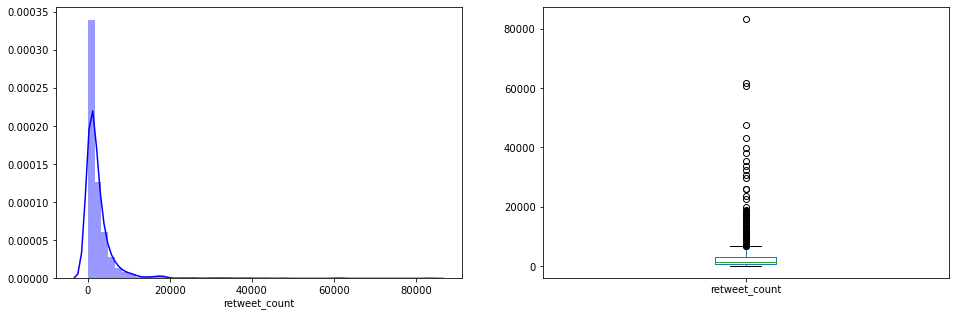

In [188]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_master['retweet_count'], color = 'blue')


plt.subplot(122)
df_master['retweet_count'].plot.box(figsize=(16,5))

plt.show()

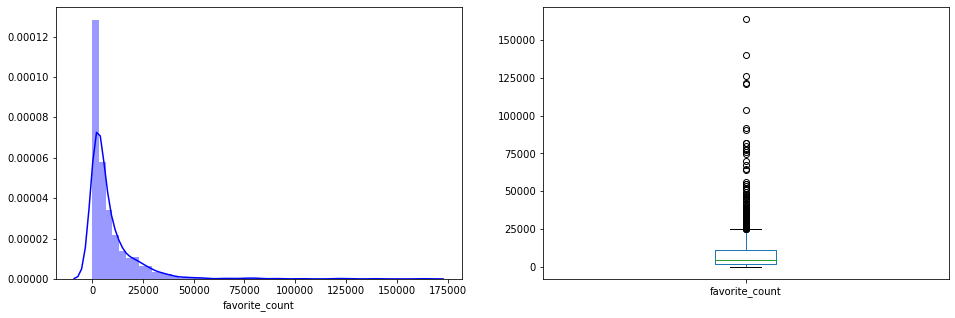

In [189]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_master['favorite_count'], color = 'blue')


plt.subplot(122)
df_master['favorite_count'].plot.box(figsize=(16,5))

plt.show()

In [190]:
#create a timestamp containing month and year
#https://erikrood.com/Python_References/extract_month_year_pandas_final.html
df_master['year'] = pd.DatetimeIndex(df_master['timestamp']).year

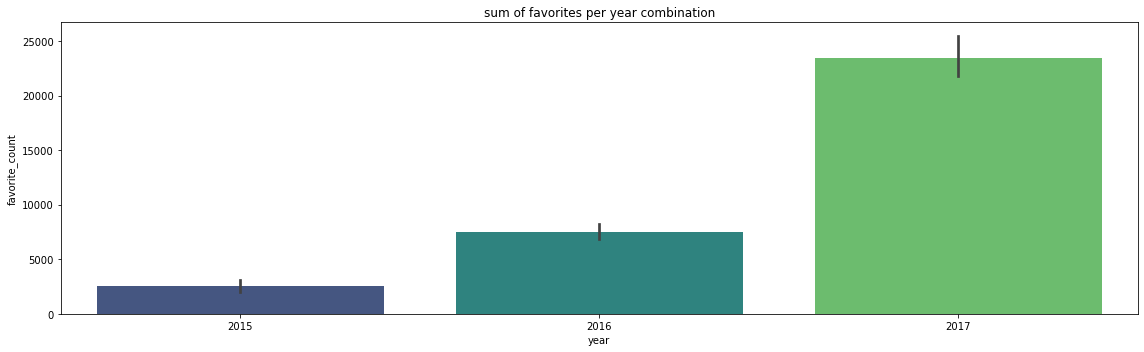

In [191]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "year", y = "favorite_count", data = df_master, palette = "viridis")
ax.set_title("sum of favorites per year combination");
plt.tight_layout()
plt.savefig('sum of favorites per year combination', bbox_inches='tight')

In [192]:
df_master['month_year'] = pd.to_datetime(df_master['timestamp']).dt.to_period('M')

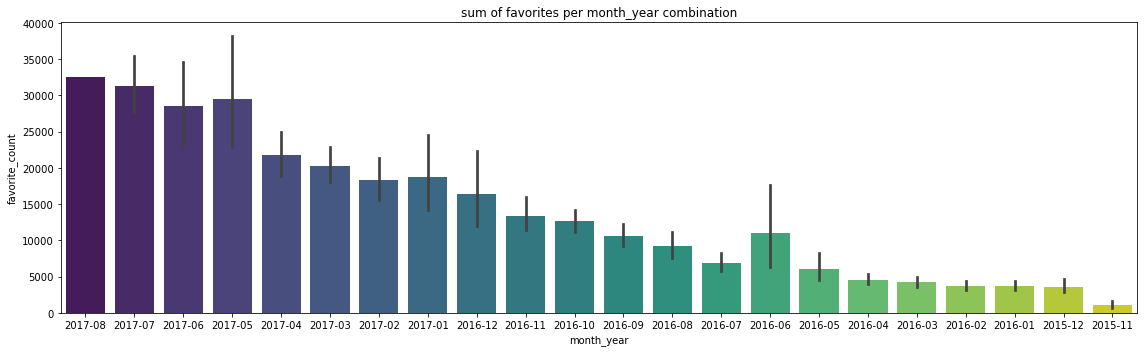

In [193]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "month_year", y = "favorite_count", data = df_master, palette = "viridis")
ax.set_title("sum of favorites per month_year combination");
plt.tight_layout()
plt.savefig('sum of favorites per month_year combination', bbox_inches='tight')

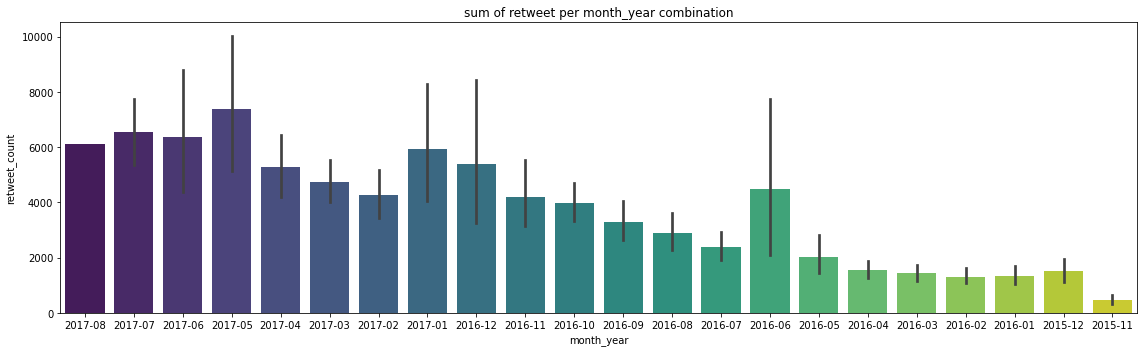

In [206]:
fig, ax = plt.subplots(figsize = (16,5))
ax = sns.barplot(x = "month_year", y = "retweet_count", data = df_master, palette = "viridis")
ax.set_title("sum of retweet per month_year combination");
plt.tight_layout()
plt.savefig('sum of retweet per month_year combination', bbox_inches='tight')

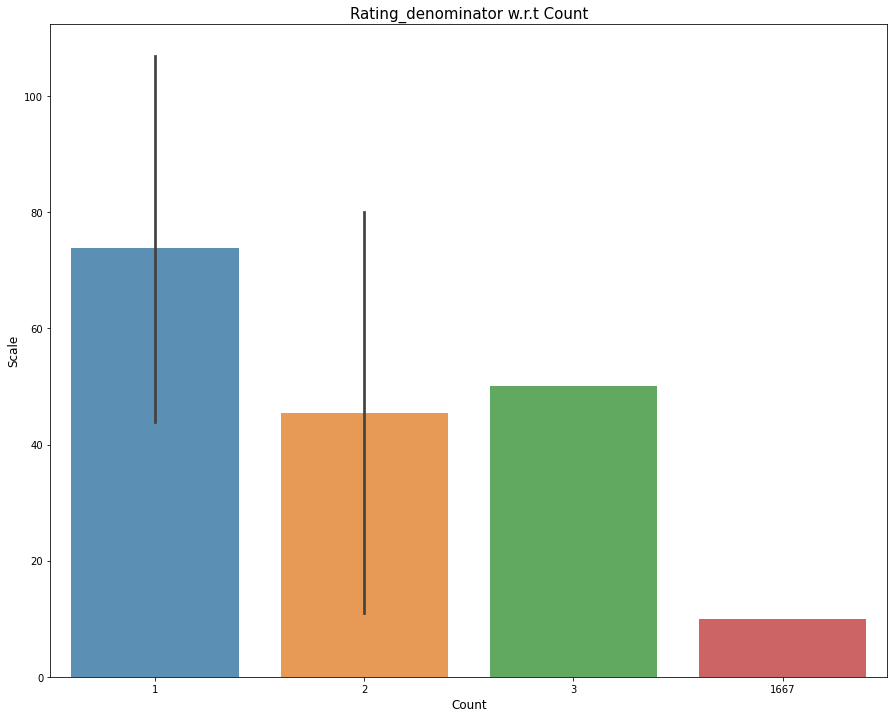

In [194]:
# Top rating_denominator values based on the count
cnt_srs = df_master['rating_denominator'].value_counts().head(30)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Scale', fontsize=12)
plt.title("Rating_denominator w.r.t Count", fontsize=15)
plt.savefig('Rating denominator wrt count', bbox_inches='tight')
plt.show()

In [201]:
df_master['rating_denominator'].value_counts()

10     1667
50        3
80        2
11        2
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

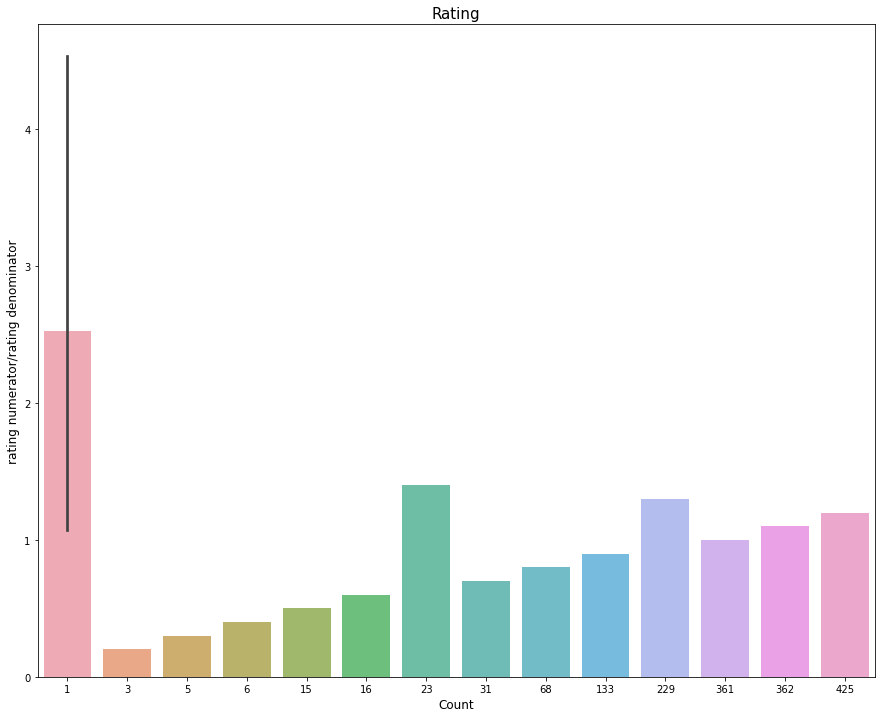

In [199]:
# Top rating_denominator values based on the count
cnt_srs = df_master['rating'].value_counts().head(30)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Count', fontsize=12)
plt.ylabel('rating numerator/rating denominator', fontsize=12)
plt.title("Rating", fontsize=15)
plt.savefig('Rating wrt count', bbox_inches='tight')
plt.show()

In [196]:
df_master['rating'].value_counts()

1.200000    425
1.100000    362
1.000000    361
1.300000    229
0.900000    133
0.800000     68
0.700000     31
1.400000     23
0.600000     16
0.500000     15
0.400000      6
0.300000      5
0.200000      3
2.700000      1
0.636364      1
2.600000      1
0.818182      1
7.500000      1
0.000000      1
3.428571      1
Name: rating, dtype: int64

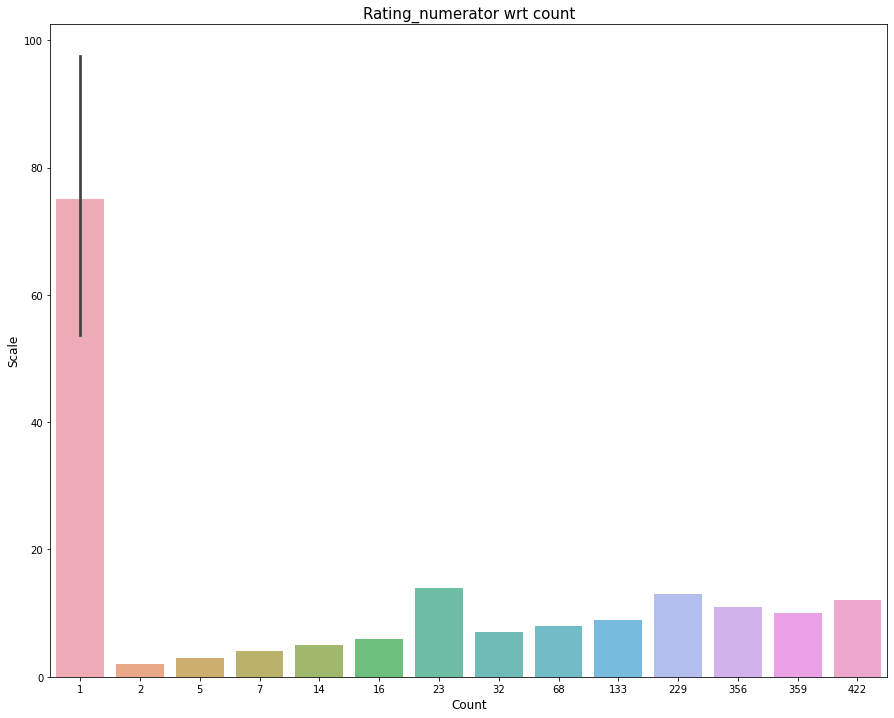

In [203]:
cnt_srs = df_master['rating_numerator'].value_counts().head(30)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Scale', fontsize=12)
plt.title("Rating_numerator wrt count", fontsize=15)
plt.savefig('Rating_numerator wrt count', bbox_inches='tight')
plt.show()

In [200]:
df_master['rating_numerator'].value_counts()

12     422
10     359
11     356
13     229
9      133
8       68
7       32
14      23
6       16
5       14
4        7
3        5
2        2
165      1
1        1
24       1
144      1
26       1
27       1
44       1
45       1
50       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
143      1
0        1
Name: rating_numerator, dtype: int64